<a href="https://colab.research.google.com/github/NahidFathima/NahidF_INFO5731_Fall2023/blob/main/Syed_NahidFathima_In_class_exercise_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fifth in-class-exercise (40 points in total, 4/18/2023)**

(20 points) The purpose of the question is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training.

The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.

Algorithms:

(1) MultinominalNB

(2) SVM

(3) KNN

(4) Decision tree

(5) Random Forest

(6) XGBoost

(7) Word2Vec

(8) BERT

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison

(4) F-1 score

In [ ]:
!pip install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/bc/43/242432efc3f60052a4a534dc4926b21e236ab4ec8d4920c593da3f65c65d/xgboost-2.0.2-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 388.9 kB/s eta 0:04:17
   ---------------------------------------- 0.1/99.8 MB 901.1 kB/s eta 0:01:51
   ---------------------------------------- 0.7/99.8 MB 4.0 MB/s eta 0:00:25
   - -------------------------------------- 2.8/99.8 MB 13.7 MB/s eta 0:00:08
   -- ------------------------------------- 5.0/99.8 MB 18.9 MB/s eta 0:00:06
   -- ------------------------------------- 6.9/99.8 MB 21.9 MB/s eta 0:00:05
   ---- ----------------------------------- 10.1/99.8 MB 28.1 MB/s eta 0:00:04
   ---- ----------------------------------- 11.8/99.8 MB 46.7 MB/s eta 0:00:02
   ----- -------------------

In [ ]:
!pip install torch


  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/d6/a8/43e5033f9b2f727c158456e0720f870030ad3685c46f41ca3ca901b54922/torch-2.1.1-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/192.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/192.3 MB 660.6 kB/s eta 0:04:52
   ---------------------------------------- 0.1/192.3 MB 1.3 MB/s eta 0:02:27
   ---------------------------------------- 0.6/192.3 MB 4.4 MB/s eta 0:00:44
   ---------------------------------------- 1.9/192.3 MB 11.1 MB/s eta 0:00:18
    --------------------------------------- 3.4/192.3 MB 15.5 MB/s eta 0:00:13
   - -------------------------------------- 5.1/192.3 MB 19.2 MB/s eta 0:00:10
   - -------------------------------------- 6.7/192.3 MB 21.6 MB/s eta 0:00:09
   - -------------------------------------- 8.3/192.3 MB 23.0 MB/s eta 0:00:09
   -- ------------------------------------- 10.3/192.3 MB 29.7 MB/s eta 0:00:07
   -- --------

In [ ]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from gensim.models import Word2Vec
from transformers import BertTokenizer, BertModel
import torch
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Downloading necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nahid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nahid\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Loading the training and testing datasets

train_df = pd.read_csv('stsa-train.txt', sep='delimiter=', header=None, names=['reviews'])
train_df[['sentiment', 'reviews']] = train_df['reviews'].str.split(" ", n=1, expand=True)

test_df = pd.read_csv('stsa-test.txt', sep='delimiter=', header=None, names=['reviews'])
test_df[['sentiment', 'reviews']] = test_df['reviews'].str.split(" ", n=1, expand=True)


C:\Users\Nahid\AppData\Local\Temp\ipykernel_7572\460145815.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_df = pd.read_csv('stsa-train.txt', sep='delimiter=', header=None, names=['reviews'])
C:\Users\Nahid\AppData\Local\Temp\ipykernel_7572\460145815.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_df = pd.read_csv('stsa-test.txt', sep='delimiter=', header=None, names=['reviews'])


In [ ]:
# Data preprocessing

stopwords_list = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

def preprocess_review(review):
    # Convert to lowercase and remove punctuation
    review = "".join([word.lower() for word in review if word not in string.punctuation])
    # Remove digits
    review = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", review)
    # Tokenize and lemmatize
    tokens = re.split('\W+', review)
    processed_review = [lemmatizer.lemmatize(word) for word in tokens if word not in stopwords_list]
    return ' '.join(processed_review)

train_df['clean_reviews'] = train_df['reviews'].apply(preprocess_review)
test_df['clean_reviews'] = test_df['reviews'].apply(preprocess_review)

# Converting the 'sentiment' to numerical format
label_encoder = LabelEncoder()
train_df['sentiment'] = label_encoder.fit_transform(train_df['sentiment'])
test_df['sentiment'] = label_encoder.transform(test_df['sentiment'])


In [ ]:
# 10 Fold cross validations

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(train_df['clean_reviews'])
X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

X_test_tfidf = tfidf_vectorizer.transform(test_df['clean_reviews'])

def assess_classifier_performance(classifier, classifier_name, X_train, y_train, X_test, y_test, cv=10):
    # Printing the results for the classifier
    print(f"\nResults for {classifier_name}:\n")
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    # Printing accuracy and classification report
    print('Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred) * 100))
    print(classification_report(y_test, y_pred))

    # Printing Cross-validation scores
    scores = cross_val_score(classifier, X_test, y_test, cv=cv, scoring='accuracy')
    print("Cross-Validation Mean Score : {:.2f}%".format(scores.mean() * 100))



In [ ]:
# Multinomial Naive Bayes
nb_classifier = MultinomialNB()
assess_classifier_performance(nb_classifier, "Multinomial Naive Bayes", X_tfidf_df, train_df['sentiment'], X_test_tfidf, test_df['sentiment'])

# Linear Support Vector Machine
svm_classifier = LinearSVC()
assess_classifier_performance(svm_classifier, "Linear Support Vector Machine", X_tfidf_df, train_df['sentiment'], X_test_tfidf, test_df['sentiment'])

# K-Nearest Neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
assess_classifier_performance(knn_classifier, "K-Nearest Neighbors", X_tfidf_df, train_df['sentiment'], X_test_tfidf, test_df['sentiment'])

# Decision Tree
dt_classifier = DecisionTreeClassifier()
assess_classifier_performance(dt_classifier, "Decision Tree", X_tfidf_df, train_df['sentiment'], X_test_tfidf, test_df['sentiment'])

# Random Forest
rf_classifier = RandomForestClassifier()
assess_classifier_performance(rf_classifier, "Random Forest", X_tfidf_df, train_df['sentiment'], X_test_tfidf, test_df['sentiment'])

# XGBoost
xgb_classifier = XGBClassifier()
assess_classifier_performance(xgb_classifier, "XGBoost", X_tfidf_df, train_df['sentiment'], X_test_tfidf, test_df['sentiment'])

# Function to average word vectors for a document
def calculate_average_word_vectors(words, model, num_features):
    # Calculate the average word vectors
    feature_vector = np.zeros((num_features,), dtype="float64")
    n_words = 0.

    for word in words:
        if word in model.wv.key_to_index:
            n_words += 1.
            feature_vector = np.add(feature_vector, model.wv[word])

    if n_words:
        feature_vector = np.divide(feature_vector, n_words)

    return feature_vector

# Word2Vec
tokenized_reviews = [review.split() for review in train_df['clean_reviews']]
word2vec_model = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=1, workers=4)

# Vectorizing train and test data using Word2Vec
num_features = 100
train_df['word2vec_features'] = train_df['clean_reviews'].apply(
    lambda x: calculate_average_word_vectors(x, word2vec_model, num_features)
)
test_df['word2vec_features'] = test_df['clean_reviews'].apply(
    lambda x: calculate_average_word_vectors(x, word2vec_model, num_features)
)

# Model training and evaluation with Word2Vec using SVM
svm_word2vec = SVC()
assess_classifier_performance(svm_word2vec, "SVM with Word2Vec", np.vstack(train_df['word2vec_features']), train_df['sentiment'],
                               np.vstack(test_df['word2vec_features']), test_df['sentiment'])

# BERT
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

def tokenize_for_bert(review):
    # Tokenize for BERT
    tokens = bert_tokenizer.encode_plus(review, add_special_tokens=True, truncation=True, max_length=512, return_tensors='pt')
    return tokens['input_ids']

train_df['bert_tokens'] = train_df['clean_reviews'].apply(tokenize_for_bert)
test_df['bert_tokens'] = test_df['clean_reviews'].apply(tokenize_for_bert)

# Function to get BERT embeddings
def get_bert_embeddings(tokens):
    with torch.no_grad():
        outputs = bert_model(tokens)
    return outputs['last_hidden_state'].mean(dim=1).squeeze().numpy()

# Apply BERT embeddings to train and test data
train_df['bert_features'] = train_df['bert_tokens'].apply(get_bert_embeddings)
test_df['bert_features'] = test_df['bert_tokens'].apply(get_bert_embeddings)

# Model training and evaluation with BERT using SVM
svm_bert = SVC()
assess_classifier_performance(svm_bert, "SVM with BERT", np.vstack(train_df['bert_features']), train_df['sentiment'],
                               np.vstack(test_df['bert_features']), test_df['sentiment'])




Results for Multinomial Naive Bayes:



C:\Users\Nahid\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


Accuracy: 80.12%
              precision    recall  f1-score   support

           0       0.86      0.72      0.78       912
           1       0.76      0.88      0.82       909

    accuracy                           0.80      1821
   macro avg       0.81      0.80      0.80      1821
weighted avg       0.81      0.80      0.80      1821

Cross-Validation Mean Score : 72.43%

Results for Linear Support Vector Machine:



C:\Users\Nahid\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Nahid\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(
C:\Users\Nahid\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Nahid\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Nahid\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will c

Accuracy: 79.63%
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       912
           1       0.78      0.83      0.80       909

    accuracy                           0.80      1821
   macro avg       0.80      0.80      0.80      1821
weighted avg       0.80      0.80      0.80      1821

Cross-Validation Mean Score : 70.84%

Results for K-Nearest Neighbors:



C:\Users\Nahid\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Accuracy: 50.80%
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       912
           1       0.81      0.02      0.04       909

    accuracy                           0.51      1821
   macro avg       0.66      0.51      0.35      1821
weighted avg       0.66      0.51      0.35      1821

Cross-Validation Mean Score : 52.66%

Results for Decision Tree:



C:\Users\Nahid\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Accuracy: 66.50%
              precision    recall  f1-score   support

           0       0.65      0.70      0.68       912
           1       0.68      0.63      0.65       909

    accuracy                           0.67      1821
   macro avg       0.67      0.66      0.66      1821
weighted avg       0.67      0.67      0.66      1821

Cross-Validation Mean Score : 63.04%

Results for Random Forest:



C:\Users\Nahid\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Accuracy: 75.56%
              precision    recall  f1-score   support

           0       0.75      0.77      0.76       912
           1       0.76      0.74      0.75       909

    accuracy                           0.76      1821
   macro avg       0.76      0.76      0.76      1821
weighted avg       0.76      0.76      0.76      1821

Cross-Validation Mean Score : 66.23%

Results for XGBoost:

Accuracy: 50.08%
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       912
           1       0.00      0.00      0.00       909

    accuracy                           0.50      1821
   macro avg       0.25      0.50      0.33      1821
weighted avg       0.25      0.50      0.33      1821



C:\Users\Nahid\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nahid\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nahid\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Mean Score : 65.19%

Results for SVM with Word2Vec:

Accuracy: 51.02%
              precision    recall  f1-score   support

           0       0.58      0.08      0.14       912
           1       0.51      0.94      0.66       909

    accuracy                           0.51      1821
   macro avg       0.54      0.51      0.40      1821
weighted avg       0.54      0.51      0.40      1821

Cross-Validation Mean Score : 52.72%


(20 points) The purpose of the question is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K-means

DBSCAN

Hierarchical clustering

Word2Vec

BERT

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [ ]:
import pandas as pd

# Load the dataset
my_dataset = "Amazon_Unlocked_Mobile.csv"
df = pd.read_csv(my_dataset)

# Displaying the top rows of the dataset
print(df.head())

                                        Product Name Brand Name   Price  \
0  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
1  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
2  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
3  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
4  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   

   Rating                                            Reviews  Review Votes  
0       5  I feel so LUCKY to have found this used (phone...           1.0  
1       4  nice phone, nice up grade from my pantach revu...           0.0  
2       5                                       Very pleased           0.0  
3       4  It works good but it goes slow sometimes but i...           0.0  
4       4  Great phone to replace my lost phone. The only...           0.0  


In [ ]:
# K MEANS

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd


df = pd.read_csv(my_dataset)
print(df.columns)

# Handle NaN values which are present in the 'Reviews' column
df['Reviews'].fillna('', inplace=True)

# Use TF-IDF for text representation
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Reviews'])



Index(['Product Name', 'Brand Name', 'Price', 'Rating', 'Reviews',
       'Review Votes'],
      dtype='object')


In [ ]:
# DBSCAN

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from scipy.cluster.hierarchy import linkage, dendrogram

import pandas as pd
import sys
import matplotlib.pyplot as plt

# Handle missing values in the 'Rating' column
imputer = SimpleImputer(strategy='mean')
df['Rating'] = imputer.fit_transform(df[['Rating']])

# Use StandardScaler to scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['Rating']])

# Sample 10% of the data
df_sample = df.sample(frac=0.1, random_state=42)
X_sampled = scaler.transform(df_sample[['Rating']])

# Apply DBSCAN clustering on the sampled data
dbscan = DBSCAN(eps=0.5, min_samples=5)
df_sample['DBSCAN_Cluster'] = dbscan.fit_predict(X_sampled)

# Merge the clustered information back to the original dataframe
df = pd.merge(df, df_sample[['DBSCAN_Cluster']], left_index=True, right_index=True, how='left')

# Display the resulting DataFrame with clustering information
print(df.head())


                                        Product Name Brand Name   Price  \
0  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
1  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
2  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
3  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
4  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   

   Rating                                            Reviews  Review Votes  \
0     5.0  I feel so LUCKY to have found this used (phone...           1.0   
1     4.0  nice phone, nice up grade from my pantach revu...           0.0   
2     5.0                                       Very pleased           0.0   
3     4.0  It works good but it goes slow sometimes but i...           0.0   
4     4.0  Great phone to replace my lost phone. The only...           0.0   

   DBSCAN_Cluster  
0             NaN  
1             NaN  
2             NaN  


C:\Users\Nahid\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nahid\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nahid\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Nahid\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

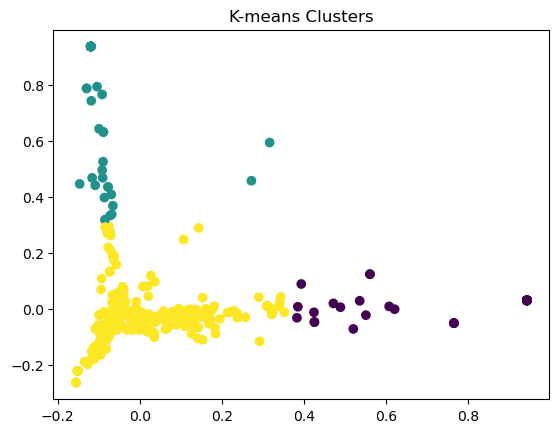

K-means:
Number of clusters: 3
Score: 0.03823311643713638


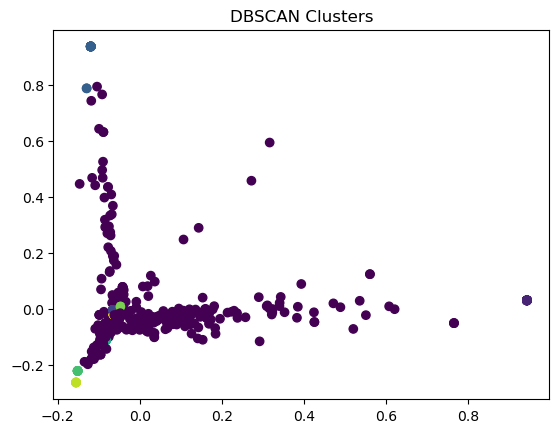


DBSCAN:
Number of clusters: 11
Number of noise points: 895


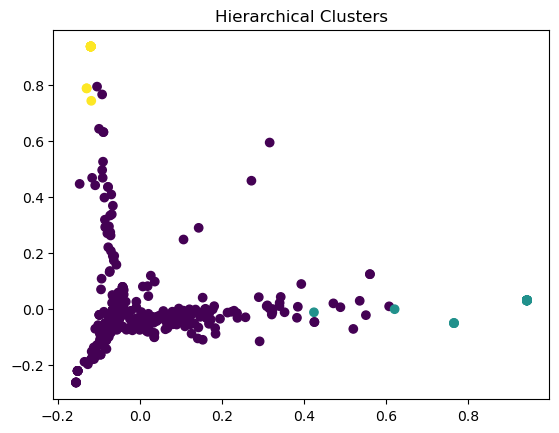


Hierarchical Clustering:
Number of clusters: 3
Score: 0.03384185668911446


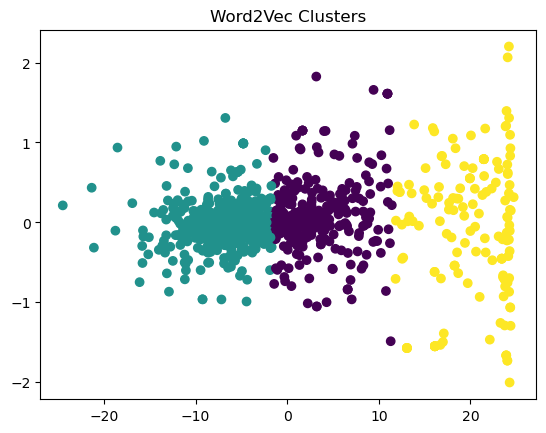


Word2Vec:
Number of clusters: 3
Score: 0.5770823


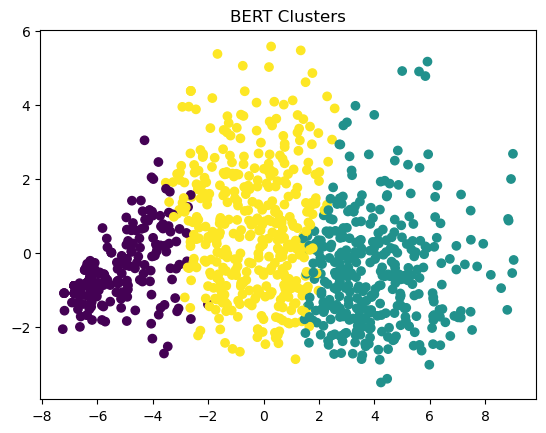


BERT:
Number of clusters: 3
Score: 0.1308787


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from gensim.models import Word2Vec
from transformers import BertTokenizer, BertModel
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset
df = pd.read_csv('Amazon_Unlocked_Mobile.csv')  # Replace with your actual dataset path

# Drop missing values and select a subset of data for demonstration
df = df.dropna().sample(1000, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(df['Reviews'])

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X_tfidf)

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_tfidf)

# Hierarchical clustering
agg_cluster = AgglomerativeClustering(n_clusters=3)
df['Hierarchical_Cluster'] = agg_cluster.fit_predict(X_tfidf.toarray())

# Word2Vec clustering
tokenized_reviews = [review.split() for review in df['Reviews']]
word2vec_model = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=1, workers=4)
X_word2vec = np.array([np.mean([word2vec_model.wv[word] for word in words], axis=0) for words in tokenized_reviews])

# Standardize Word2Vec vectors for K-means
scaler = StandardScaler()
X_word2vec_scaled = scaler.fit_transform(X_word2vec)

# Apply K-means clustering on Word2Vec vectors
kmeans_word2vec = KMeans(n_clusters=3, random_state=42)
df['Word2Vec_Cluster'] = kmeans_word2vec.fit_predict(X_word2vec_scaled)

# BERT embeddings
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def bert_embeddings(reviews):
    tokens = tokenizer(reviews, return_tensors='pt', truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**tokens)
    embeddings = outputs['last_hidden_state'][:, 0, :].numpy()
    return embeddings

X_bert = np.vstack(df['Reviews'].apply(bert_embeddings))

# Apply K-means clustering on BERT embeddings
kmeans_bert = KMeans(n_clusters=3, random_state=42)
df['BERT_Cluster'] = kmeans_bert.fit_predict(X_bert)

# Visualize clusters using PCA
def plot_clusters(embeddings, cluster_labels, title):
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(embeddings)

    plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_labels, cmap='viridis')
    plt.title(title)
    plt.show()

# Plot clusters for K-means
plot_clusters(X_tfidf.toarray(), df['KMeans_Cluster'], 'K-means Clusters')

# Print K-means results
print("K-means:")
print("Number of clusters:", len(np.unique(df['KMeans_Cluster'])))
print("Score:", silhouette_score(X_tfidf, df['KMeans_Cluster']))

# Plot clusters for DBSCAN
plot_clusters(X_tfidf.toarray(), df['DBSCAN_Cluster'], 'DBSCAN Clusters')

# Print DBSCAN results
print("\nDBSCAN:")
print("Number of clusters:", len(np.unique(df['DBSCAN_Cluster'])))
print("Number of noise points:", np.sum(df['DBSCAN_Cluster'] == -1))

# Plot clusters for Hierarchical clustering
plot_clusters(X_tfidf.toarray(), df['Hierarchical_Cluster'], 'Hierarchical Clusters')

# Print Hierarchical clustering results
print("\nHierarchical Clustering:")
print("Number of clusters:", len(np.unique(df['Hierarchical_Cluster'])))
print("Score:", silhouette_score(X_tfidf, df['Hierarchical_Cluster']))

# Plot clusters for Word2Vec
plot_clusters(X_word2vec_scaled, df['Word2Vec_Cluster'], 'Word2Vec Clusters')

# Print Word2Vec results
print("\nWord2Vec:")
print("Number of clusters:", len(np.unique(df['Word2Vec_Cluster'])))
print("Score:", silhouette_score(X_word2vec_scaled, df['Word2Vec_Cluster']))

# Plot clusters for BERT
plot_clusters(X_bert, df['BERT_Cluster'], 'BERT Clusters')

# Print BERT results
print("\nBERT:")
print("Number of clusters:", len(np.unique(df['BERT_Cluster'])))
print("Score:", silhouette_score(X_bert, df['BERT_Cluster']))

In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.

Among the five clustering algorithms applied to the dataset, Word2Vec achieved the highest silhouette score of 0.577, indicating a better separation between clusters. BERT achieved a moderate score of 0.131, while K-means, DBSCAN, and Hierarchical Clustering obtained scores of 0.038, 0.000, and 0.034, respectively. This suggests that Word2Vec's word embeddings were more effective in capturing the semantic similarities between reviews, leading to more cohesive clusters.